# Fundamentals of Data Science - Sentiment Analysis on twitter Data

## Import Data set

In [15]:
import pandas as pd
from pprint import pprint
#pd.set_option('display.max_colwidth', -1)

In [8]:
import json
S_DIR = r'C:\Users\ruche\Downloads\geotagged_tweets_20160812-0912.1000.jsons'

tweets_data = []
tweets_file = open(S_DIR, "r")

for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
# This creates a python list of strings with json data in the string.  

pprint(tweets_data[1:10])

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Wed Aug 17 20:18:54 +0000 2016',
  'entities': {'hashtags': [{'indices': [27, 38], 'text': 'NeverTrump'},
                            {'indices': [39, 51], 'text': 'BuhByeTRUMP'},
                            {'indices': [53, 66], 'text': 'TrumpIsUnfit'}],
               'media': [{'display_url': 'pic.twitter.com/YjYABvQ8pw',
                          'expanded_url': 'http://twitter.com/JimmyBear2/status/766006411994292224/photo/1',
                          'id': 766006400556335104,
                          'id_str': '766006400556335104',
                          'indices': [67, 90],
                          'media_url': 'http://pbs.twimg.com/media/CqFmw0jWAAAcPTl.jpg',
                          'media_url_https': 'https://pbs.twimg.com/media/CqFmw0jWAAAcPTl.jpg',
                          'sizes': {'large': {'h': 480,
                                              'resize': 'fit',
                                       

In [13]:
# Print the keys of the dataset collected from one tweet 
# This gives an overview of what information is in the dataset
print(tweets_data[0].keys())

len(tweets_data)
#inspect the keys that may be necessary for sentiment analysis. Essentially the tweet is the most important part

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'entities', 'extended_entities', 'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms'])


1000

In [11]:
import re

# A function that extracts the hyperlinks from the tweet's content.
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

# A function that checks whether a word is included in the tweet's content
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [98]:
tweets = pd.DataFrame()

tweets['text'] =    list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] =    list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))
tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

tweets

,text,lang,country,link
0,@HillaryClinton @POTUS @JudgeJeanine @NBA @NFL @MLB @UCLA @greta @dukeblueplanet There IS A PLAN U PIC ❤️✝👀 https://t.co/UDsJmesa5w,en,United States,https://t.co/UDsJmesa5w
1,IF THEY ONLY HAD A BRAIN! \n#NeverTrump #BuhByeTRUMP \n#TrumpIsUnfit https://t.co/YjYABvQ8pw,en,United States,https://t.co/YjYABvQ8pw
2,"Attorney's first line of defense to those they represent: just keep saying ""I don't recall"" ""I don't remember"" #lyingHillary @HillaryClinton",en,United States,
3,@kikesma @norma22flores @EPN @realDonaldTrump No lo recibió como presidente,es,México,
4,"Classy.. Better than I expected. But on a serious note, why would u ever want to go to an event like this? Crazy. https://t.co/jOdETLmkSn",en,United States,https://t.co/jOdETLmkSn
5,@realDonaldTrump I wouldn't even consider it when it is a consolation dinner for you.,en,United States,
6,"Join me again @CNN @ThisHour 11:45am re #Trump's dumb ""bigot"" comment. Is he projecting? Yes. Knows most Americans see him as bigoted/racist",en,United States,
7,More fraud from soros and Clinton https://t.co/cjHD1eqW6U,en,United States,https://t.co/cjHD1eqW6U
8,Right! @realDonaldTrump thinks he's special‼️ https://t.co/pHMrEcs1Hj,en,United States,https://t.co/pHMrEcs1Hj
9,@JohnKStahlUSA I want @realDonaldTrump to say that he will prosecute her and all them for crimes against USA including Bill when elected!,en,United States,


## Pre-processing 

In [254]:
# create an empty list for the text that has been "cleaned"
list_clean_text = []

for i in tweets["text"]:
    # this removes the hyperlink
    result = re.sub(r"http\S+", "", i)
    # this removes the people the text was directed to e.g. @HillaryClinton or @CNN
    result2 = re.sub(r"\B@\S+.", "", result)
    result3 = re.sub(r"\d+.", "", result2)
    list_clean_text.append(result3)

# make a new column with the clean text
tweets["clean_text"] = list_clean_text

In [326]:
#Lexicon Normalization
#performing stemming and Lemmatization
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# Create a set of stopwords
stop = set(stopwords.words('english'))
stop.update(set(["n", "u", "im"]))

# Create a set of punctuation words 
exclude = set(string.punctuation) 

# This is the function makeing the lemmatization
lemma = WordNetLemmatizer()

# In this function we perform the entire cleaning
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# This is the clean corpus.
doc_clean = [clean(doc) for doc in list_clean_text] 
            

In [350]:
from nltk.tokenize import RegexpTokenizer
import html.parser as HTMLParser# In Python 3.4+ import html 
import nltk

# Tokenize each clean text
tokenized_tweets = []
tokenizer = RegexpTokenizer(r'\w+')
for i in doc_clean:
    tokens = tokenizer.tokenize(i)
    tokenized_tweets.append(tokens)

tweets["tokens"] = tokenized_tweets
# flatten the list of lists to combine all words in one list
flattened_list_of_tokens = [y for x in tokenized_tweets for y in x]

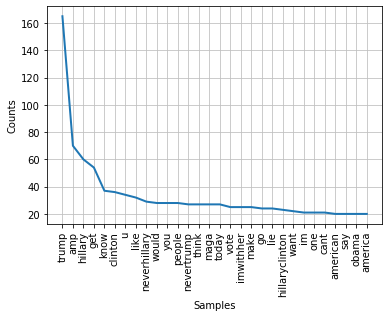

In [347]:
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return (wordlist, word_features)

word_features = get_word_features(flattened_list_of_tokens)
word_features[0].most_common(10)

# Frequency Distribution Plot
import matplotlib.pyplot as plt
word_features[0].plot(30,cumulative=False)
plt.show()

## Training the Model

In [369]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews

# A function that extracts which words exist in a text based on a list of words to which we compare.
def word_feats(words):
        return dict([(word, True) for word in words])

# Get the negative reviews for movies    
negids = movie_reviews.fileids('neg')

# Get the positive reviews for movies
posids = movie_reviews.fileids('pos')
 
# Find the features that most correspond to negative reviews    
negfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'neg') for f in negids]

# Find the features that most correspond to positive reviews
posfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'pos') for f in posids]

# We would only use 1500 instances to train on. The quarter of the reviews left is for testing purposes.
negcutoff = int(len(negfeats)*3/4)
poscutoff = int(len(posfeats)*3/4)

In [372]:
from pprint import pprint
# Construct the training dataset containing 50% positive reviews and 50% negative reviews
trainfeats = negfeats[:negcutoff] + posfeats[:poscutoff]

# Construct the negative dataset containing 50% positive reviews and 50% negative reviews
testfeats = negfeats[negcutoff:] + posfeats[poscutoff:]

print ('train on %d instances, test on %d instances' % (len(trainfeats), len(testfeats)))

# Train a NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(trainfeats)

# Test the trained classifier and display the most informative features.
print ('accuracy:', nltk.classify.util.accuracy(classifier, testfeats))
print (classifier.show_most_informative_features(32))

train on 1500 instances, test on 500 instances
accuracy: 0.728
Most Informative Features
             magnificent = True              pos : neg    =     15.0 : 1.0
             outstanding = True              pos : neg    =     13.6 : 1.0
               insulting = True              neg : pos    =     13.0 : 1.0
              vulnerable = True              pos : neg    =     12.3 : 1.0
               ludicrous = True              neg : pos    =     11.8 : 1.0
             uninvolving = True              neg : pos    =     11.7 : 1.0
                  avoids = True              pos : neg    =     11.7 : 1.0
             fascination = True              pos : neg    =     10.3 : 1.0
              astounding = True              pos : neg    =     10.3 : 1.0
                 idiotic = True              neg : pos    =      9.8 : 1.0
               affecting = True              pos : neg    =      9.7 : 1.0
                  symbol = True              pos : neg    =      9.7 : 1.0
           

In [374]:
def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    print ("Word frequency list\n")
    pprint(wordlist)
    return word_features

word_features = get_word_features(get_words_in_tweets(trainfeats))
# Construct our features based on which tweets contain which word
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

Word frequency list

{'\x05': 4,
 '\x05\x05': 1,
 '\x12': 5,
 '\x13': 3,
 '\x14': 3,
 '\x16': 2,
 '!': 508,
 '"': 1156,
 '#': 21,
 '#@%$^': 1,
 '$': 123,
 '$$': 1,
 '$&#': 1,
 '$@^@': 1,
 '%': 34,
 '&': 116,
 '&#': 10,
 "'": 1485,
 "''": 8,
 "'-": 3,
 "'--": 1,
 '(': 1426,
 ')': 1427,
 '*': 171,
 '+': 49,
 ',': 1498,
 '-': 1413,
 "-'": 2,
 '--': 413,
 '---': 12,
 '----': 2,
 '-----': 2,
 '--------------------': 1,
 '--------------------------------------------------------------': 2,
 '-`': 1,
 '.': 1500,
 '/': 357,
 "/'": 1,
 '//': 6,
 '/~': 1,
 '0': 29,
 '00': 7,
 '000': 70,
 '0009f': 1,
 '007': 7,
 '00s': 1,
 '03': 1,
 '04': 1,
 '05': 2,
 '05425': 1,
 '1': 162,
 '10': 136,
 '100': 44,
 '1000': 9,
 '100m': 2,
 '101': 13,
 '102': 7,
 '103': 3,
 '105': 3,
 '106': 2,
 '107': 4,
 '108': 1,
 '109': 1,
 '10b': 1,
 '10th': 2,
 '11': 22,
 '110': 2,
 '111': 1,
 '112': 1,
 '113': 2,
 '1138': 1,
 '114': 1,
 '115': 3,
 '117': 1,
 '118': 1,
 '11th': 2,
 '12': 41,
 '121': 1,
 '122': 1,
 '123': 1,
 

 'abundant': 3,
 'abundantly': 3,
 'abundence': 1,
 'abuse': 19,
 'abused': 7,
 'abusers': 2,
 'abuses': 2,
 'abusing': 2,
 'abusive': 12,
 'abuzz': 1,
 'abysmal': 5,
 'abysmally': 1,
 'abyss': 18,
 'ac': 1,
 'ac3': 1,
 'academe': 1,
 'academia': 2,
 'academic': 7,
 'academy': 70,
 'accelerate': 1,
 'accelerated': 1,
 'accelerates': 1,
 'accelerator': 1,
 'accent': 65,
 'accented': 3,
 'accents': 14,
 'accentuate': 4,
 'accentuated': 1,
 'accentuates': 2,
 'accept': 49,
 'acceptable': 23,
 'acceptance': 11,
 'accepted': 16,
 'accepting': 14,
 'acception': 1,
 'accepts': 17,
 'access': 8,
 'accessibility': 2,
 'accessible': 10,
 'accessory': 1,
 'accident': 61,
 'accidental': 7,
 'accidentally': 44,
 'accidentlly': 1,
 'accidently': 2,
 'accidents': 6,
 'acclaim': 9,
 'acclaimed': 23,
 'acclimatize': 1,
 'accolades': 6,
 'accommodate': 1,
 'accommodates': 2,
 'accommodating': 3,
 'accomodates': 1,
 'accompanied': 21,
 'accompanies': 5,
 'accompaniment': 6,
 'accompany': 12,
 'accompanyi

 'annabella': 4,
 'annabeth': 3,
 'annaud': 2,
 'anne': 30,
 'annette': 13,
 'annie': 18,
 'annihilate': 1,
 'annihilation': 4,
 'anniversary': 12,
 'announce': 4,
 'announced': 6,
 'announcement': 4,
 'announcements': 1,
 'announcer': 3,
 'announces': 10,
 'announcing': 1,
 'annoy': 5,
 'annoyance': 4,
 'annoyances': 1,
 'annoyed': 14,
 'annoying': 109,
 'annoyingly': 8,
 'annoys': 2,
 'annual': 14,
 'anomaly': 1,
 'anonymity': 2,
 'anonymous': 10,
 'anonymously': 3,
 'anorexic': 1,
 'another': 588,
 'ansell': 2,
 'answer': 70,
 'answered': 18,
 'answering': 2,
 'answers': 37,
 'ant': 7,
 'antagonist': 8,
 'antagonists': 3,
 'antagonizes': 3,
 'antagonizing': 1,
 'antarctic': 1,
 'antarctica': 2,
 'ante': 3,
 'antenna': 2,
 'antennae': 1,
 'anthem': 1,
 'anthology': 2,
 'anthony': 43,
 'anthrax': 1,
 'anthro': 1,
 'anthropological': 1,
 'anthropologist': 6,
 'anthropologists': 1,
 'anthropology': 2,
 'anthropomorphized': 2,
 'anti': 55,
 'antichrist': 3,
 'anticipants': 1,
 'anticipat

 'bakkers': 1,
 'bakshi': 2,
 'bakula': 2,
 'bala': 1,
 'balaban': 2,
 'balance': 26,
 'balanced': 8,
 'balances': 2,
 'balancing': 7,
 'balasko': 1,
 'balbricker': 1,
 'balcony': 3,
 'bald': 13,
 'balderdash': 2,
 'balding': 1,
 'baldly': 1,
 'baldwin': 29,
 'bale': 2,
 'balinski': 1,
 'balk': 5,
 'balki': 1,
 'ball': 44,
 'ballad': 7,
 'ballads': 3,
 'ballard': 1,
 'ballentine': 1,
 'ballet': 6,
 'balletic': 1,
 'balliol': 1,
 'ballistic': 3,
 'ballistics': 1,
 'balloon': 2,
 'ballooning': 1,
 'balloons': 3,
 'ballot': 1,
 'ballroom': 5,
 'balls': 17,
 'ballyhoo': 2,
 'ballyhooed': 1,
 'balm': 1,
 'balmy': 1,
 'balrogs': 1,
 'balthazar': 1,
 'baltimore': 1,
 'balto': 2,
 'baltus': 1,
 'baluyev': 1,
 'bambi': 1,
 'bamboo': 2,
 'banal': 18,
 'banalities': 1,
 'banality': 5,
 'banana': 10,
 'bananas': 7,
 'bancroft': 6,
 'band': 62,
 'bandaged': 1,
 'bandages': 1,
 'bandanna': 1,
 'bandaras': 1,
 'banderas': 17,
 'banderes': 1,
 'bandit': 2,
 'banditos': 1,
 'bandits': 3,
 'bandmate': 1

 'bloopers': 3,
 'blossom': 5,
 'blossoming': 1,
 'blossoms': 2,
 'blot': 2,
 'blotted': 1,
 'blotteth': 1,
 'blouse': 2,
 'blow': 38,
 'blowed': 1,
 'blowhard': 1,
 'blowing': 18,
 'blowjob': 1,
 'blowjobs': 1,
 'blown': 30,
 'blows': 31,
 'blubbering': 1,
 'blucas': 1,
 'blucher': 1,
 'bludgeoning': 1,
 'bludgeons': 2,
 'blue': 84,
 'bluebirds': 1,
 'bluegrass': 2,
 'bluejeans': 1,
 'blueprint': 5,
 'blueprints': 3,
 'bluer': 3,
 'blues': 22,
 'bluescreen': 2,
 'bluescreening': 1,
 'bluesman': 1,
 'bluff': 1,
 'blume': 2,
 'blunder': 2,
 'blundered': 1,
 'blunderheaded': 1,
 'blunders': 3,
 'blunt': 5,
 'blunted': 1,
 'bluntly': 6,
 'bluntman': 2,
 'bluntness': 1,
 'blunts': 1,
 'blur': 2,
 'blurb': 1,
 'blurred': 6,
 'blurry': 2,
 'blurs': 2,
 'blurt': 2,
 'blurts': 3,
 'blush': 3,
 'bluster': 2,
 'blustered': 1,
 'bluth': 1,
 'bluto': 1,
 'blythe': 5,
 'bmw': 3,
 'bo': 5,
 'board': 51,
 'boarded': 2,
 'boarder': 2,
 'boarding': 10,
 'boardroom': 2,
 'boards': 6,
 'boardwalk': 1,
 '

 'cady': 1,
 'caerthan': 2,
 'caesar': 1,
 'caesella': 1,
 'caf': 3,
 'cafe': 7,
 'cafes': 1,
 'cafeteria': 3,
 'caffeinated': 1,
 'caffeine': 1,
 'cage': 39,
 'caged': 3,
 'cagey': 1,
 'cagney': 1,
 'cahoots': 3,
 'cain': 3,
 'caine': 7,
 'cajun': 1,
 'cake': 13,
 'cakes': 2,
 'cal': 6,
 'calahan': 1,
 'calamitous': 1,
 'calcium': 1,
 'calculated': 9,
 'calculatedly': 1,
 'calculating': 5,
 'calculation': 1,
 'calculations': 1,
 'calculative': 1,
 'calder': 1,
 'calderon': 1,
 'caldicott': 1,
 'caldwell': 1,
 'cale': 1,
 'caleb': 3,
 'calendar': 3,
 'calgary': 1,
 'calhoun': 1,
 'caliber': 24,
 'calibre': 6,
 'calif': 1,
 'california': 31,
 'caligari': 1,
 'caligula': 3,
 'calisthenics': 1,
 'calitri': 1,
 'call': 136,
 'callaghan': 1,
 'callaway': 1,
 'called': 231,
 'caller': 3,
 'callin': 1,
 'calling': 24,
 'callous': 4,
 'callously': 1,
 'callousness': 1,
 'callow': 1,
 'calloway': 3,
 'calls': 72,
 'callum': 1,
 'calm': 18,
 'calmer': 1,
 'calming': 2,
 'calmly': 7,
 'calorie': 

 'chuckle': 18,
 'chuckled': 5,
 'chuckles': 16,
 'chuckling': 4,
 'chucky': 2,
 'chugging': 1,
 'chugs': 1,
 'chum': 2,
 'chumming': 1,
 'chummy': 2,
 'chump': 1,
 'chums': 4,
 'chun': 1,
 'chung': 1,
 'chunk': 8,
 'chunks': 7,
 'chunky': 1,
 'chunnel': 2,
 'church': 30,
 'churches': 6,
 'churchgoing': 1,
 'churchill': 1,
 'churlishness': 1,
 'churn': 5,
 'churned': 5,
 'churning': 3,
 'churns': 2,
 'chushingura': 1,
 'chute': 3,
 'chutes': 1,
 'chutzpah': 1,
 'chyron': 1,
 'cia': 15,
 'ciaran': 1,
 'cicero': 1,
 'cici': 2,
 'cid': 1,
 'cider': 4,
 'cigar': 5,
 'cigarette': 7,
 'cigarettes': 8,
 'cigars': 1,
 'ciggy': 1,
 'cimino': 1,
 'cincinnati': 4,
 'cinderella': 5,
 'cindy': 6,
 'cinema': 118,
 'cinemas': 5,
 'cinemascope': 1,
 'cinematic': 84,
 'cinematical': 1,
 'cinematically': 6,
 'cinematographer': 50,
 'cinematographers': 6,
 'cinematographr': 1,
 'cinematography': 93,
 'cinemax': 5,
 'cinemtography': 1,
 'cinephiles': 1,
 'cineplex': 2,
 'cineplexes': 2,
 'cinergi': 1,
 'c

 'constance': 2,
 'constant': 59,
 'constantly': 93,
 'constanza': 1,
 'constellations': 2,
 'constipated': 2,
 'constipation': 1,
 'constituency': 1,
 'constitute': 2,
 'constitutes': 3,
 'constitutionality': 1,
 'constrained': 3,
 'constraints': 1,
 'constrast': 1,
 'constricted': 2,
 'construct': 5,
 'constructed': 23,
 'construction': 18,
 'constructive': 1,
 'constructs': 1,
 'construed': 5,
 'consulate': 1,
 'consult': 3,
 'consultant': 7,
 'consultants': 1,
 'consultation': 1,
 'consulted': 1,
 'consumated': 1,
 'consume': 4,
 'consumed': 2,
 'consumer': 5,
 'consumerism': 1,
 'consumers': 2,
 'consumes': 4,
 'consuming': 5,
 'consummate': 1,
 'consummating': 1,
 'consumption': 3,
 'cont': 1,
 'contact': 46,
 'contacted': 2,
 'contacting': 1,
 'contacts': 6,
 'contagion': 1,
 'contagious': 2,
 'contain': 30,
 'contained': 19,
 'containers': 1,
 'containing': 19,
 'contains': 77,
 'contaminated': 2,
 'contantly': 1,
 'contemplate': 2,
 'contemplates': 4,
 'contemplating': 7,
 'co

 'danforth': 1,
 'dang': 2,
 'danger': 42,
 'dangereuses': 1,
 'dangerfield': 1,
 'dangerous': 47,
 'dangerously': 4,
 'dangers': 9,
 'dangle': 1,
 'dangles': 1,
 'dangling': 7,
 'danica': 1,
 'daniel': 35,
 'danielle': 5,
 'daniels': 10,
 'danika': 1,
 'danilov': 1,
 'danish': 2,
 'dank': 3,
 'dann': 1,
 'danna': 3,
 'danner': 5,
 'danny': 52,
 'dano': 2,
 'dans': 3,
 'danson': 3,
 'dante': 16,
 'dantes': 1,
 'danvers': 2,
 'danza': 2,
 'daphne': 8,
 'dapper': 1,
 'daqughter': 1,
 'dar': 1,
 'darabont': 2,
 'darby': 3,
 'darcy': 3,
 'dare': 23,
 'dared': 4,
 'daredevil': 4,
 'dares': 10,
 'daresay': 2,
 'dargus': 2,
 'daria': 1,
 'daring': 13,
 'dario': 4,
 'darius': 3,
 'dariush': 1,
 'dark': 168,
 'darken': 1,
 'darkened': 4,
 'darker': 14,
 'darkest': 9,
 'darkly': 9,
 'darkman': 2,
 'darkness': 30,
 'darlanne': 1,
 'darlene': 3,
 'darling': 3,
 'darn': 20,
 'darndest': 1,
 'darned': 6,
 'darnedness': 1,
 'darnell': 2,
 'darrell': 1,
 'darren': 8,
 'darrow': 1,
 'darryl': 6,
 'dart

 'discussing': 13,
 'discussion': 18,
 'discussions': 6,
 'disdain': 3,
 'disdainful': 1,
 'disdains': 1,
 'disease': 19,
 'diseased': 1,
 'diseases': 2,
 'disection': 1,
 'disembodied': 2,
 'disemboweling': 1,
 'disembowelments': 2,
 'disenchanted': 3,
 'disenfranchised': 3,
 'disengaged': 2,
 'disfigured': 5,
 'disgrace': 2,
 'disgraced': 4,
 'disgraceful': 1,
 'disgruntled': 5,
 'disguise': 19,
 'disguised': 9,
 'disguises': 9,
 'disguising': 2,
 'disgust': 11,
 'disgusted': 7,
 'disgustedly': 1,
 'disgusting': 12,
 'disgustingly': 5,
 'dish': 8,
 'disheartened': 1,
 'disheartening': 4,
 'dishearteningly': 1,
 'dished': 2,
 'dishes': 3,
 'disheveled': 1,
 'dishonor': 1,
 'dishonourable': 1,
 'dishwasher': 3,
 'disillusioned': 7,
 'disillusionment': 3,
 'disilusioned': 1,
 'disingenuous': 1,
 'disintegrate': 1,
 'disintegrated': 1,
 'disintegration': 2,
 'disinterest': 2,
 'disinterested': 2,
 'disintigrated': 1,
 'disinvited': 1,
 'disjointed': 9,
 'disjointedness': 1,
 'disjointmen

 'electronics': 1,
 'electroshock': 1,
 'elects': 2,
 'elegaic': 1,
 'elegance': 4,
 'elegant': 12,
 'elegantly': 5,
 'elegiac': 1,
 'elegy': 1,
 'elektra': 1,
 'element': 87,
 'elementary': 4,
 'elements': 150,
 'elena': 5,
 'elephant': 9,
 'elevate': 6,
 'elevated': 7,
 'elevates': 1,
 'elevating': 1,
 'elevator': 10,
 'elevators': 1,
 'eleven': 8,
 'eleventh': 1,
 'elexa': 1,
 'elfman': 17,
 'elfont': 1,
 'elgar': 1,
 'eli': 1,
 'elias': 6,
 'elicit': 7,
 'elicited': 3,
 'eliciting': 4,
 'elicitor': 1,
 'elicits': 4,
 'elie': 1,
 'eliel': 1,
 'eligibility': 2,
 'eligible': 2,
 'elijah': 7,
 'eliminate': 11,
 'eliminated': 3,
 'eliminates': 1,
 'eliminating': 1,
 'elimination': 4,
 'elina': 1,
 'eliot': 2,
 'elisa': 1,
 'elisabeth': 13,
 'elise': 10,
 'elite': 12,
 'elitism': 2,
 'elitist': 1,
 'elitists': 1,
 'elixir': 1,
 'eliza': 3,
 'elizabeth': 43,
 'elizabethan': 1,
 'elizabethian': 1,
 'elizando': 1,
 'elk': 1,
 'elke': 1,
 'elks': 1,
 'ella': 3,
 'elle': 6,
 'ellen': 21,
 'el

 'exqueeze': 1,
 'exquisite': 9,
 'exquisitely': 3,
 'exstensive': 1,
 'extend': 4,
 'extended': 36,
 'extending': 1,
 'extends': 3,
 'extension': 4,
 'extensions': 2,
 'extensive': 14,
 'extensively': 3,
 'extent': 23,
 'extentions': 1,
 'extents': 1,
 'exterior': 5,
 'exteriors': 5,
 'exterminate': 3,
 'exterminated': 2,
 'exterminating': 2,
 'extermination': 1,
 'exterminator': 2,
 'external': 5,
 'extinct': 3,
 'extinction': 3,
 'extinguished': 2,
 'extinguisher': 1,
 'extinguishing': 1,
 'extols': 1,
 'extort': 3,
 'extortion': 1,
 'extorts': 1,
 'extra': 53,
 'extract': 5,
 'extracted': 2,
 'extracting': 2,
 'extraction': 2,
 'extracts': 1,
 'extracurricular': 1,
 'extramarital': 2,
 'extraneous': 9,
 'extraordinaire': 5,
 'extraordinarily': 11,
 'extraordinary': 30,
 'extrapolation': 2,
 'extras': 18,
 'extraterrestrial': 5,
 'extraterrestrials': 3,
 'extravagant': 11,
 'extravaganza': 4,
 'extravaganzas': 1,
 'extravertedness': 1,
 'extreme': 50,
 'extremel': 1,
 'extremely': 1

 'frain': 3,
 'fraker': 1,
 'frakes': 2,
 'frame': 52,
 'framed': 25,
 'frames': 10,
 'framework': 13,
 'framing': 6,
 'frampton': 1,
 'fran': 3,
 'france': 27,
 'frances': 10,
 'francesca': 3,
 'francesco': 2,
 'franchise': 36,
 'franchises': 2,
 'francie': 2,
 'francine': 1,
 'franciosa': 1,
 'francis': 20,
 'francisco': 14,
 'francisco_': 1,
 'franco': 3,
 'francois': 5,
 'francoise': 1,
 'frank': 66,
 'franka': 1,
 'franken': 1,
 'frankenheimer': 8,
 'frankenstein': 13,
 'frankenweenie': 1,
 'frankfurters': 1,
 'frankie': 6,
 'frankiln': 1,
 'franklin': 12,
 'frankly': 43,
 'frankness': 1,
 'franks': 1,
 'frann': 1,
 'frantic': 9,
 'frantically': 10,
 'franz': 4,
 'franzoni': 1,
 'frappacino': 1,
 'fraser': 6,
 'frasier': 3,
 'frat': 3,
 'fratboy': 1,
 'fraternity': 1,
 'frau': 3,
 'fraud': 5,
 'frauds': 1,
 'fraught': 5,
 'fray': 2,
 'frazzled': 1,
 'freak': 22,
 'freaked': 2,
 'freakin': 1,
 'freaking': 3,
 'freakish': 3,
 'freaks': 10,
 'freaky': 6,
 'frears': 4,
 'fred': 17,
 '

 'grammy': 2,
 'gramophone': 1,
 'grand': 62,
 'grandchild': 2,
 'granddaddy': 1,
 'granddaughter': 3,
 'granddaughters': 1,
 'grande': 1,
 'grander': 2,
 'grandeur': 2,
 'grandfather': 14,
 'grandiose': 3,
 'grandma': 8,
 'grandmother': 13,
 'grandmothers': 1,
 'grandpa': 4,
 'grandparents': 4,
 'grandson': 5,
 'granger': 15,
 'granite': 2,
 'granny': 3,
 'grant': 37,
 'granted': 40,
 'granting': 1,
 'grants': 4,
 'grape': 6,
 'grapevine': 1,
 'graph': 1,
 'graphic': 60,
 'graphical': 1,
 'graphically': 2,
 'graphics': 10,
 'grapples': 1,
 'grappling': 1,
 'gras': 1,
 'grasp': 23,
 'grasping': 4,
 'grass': 7,
 'grasshopper': 2,
 'grasshoppers': 4,
 'grassroots': 1,
 'grassy': 1,
 'grate': 3,
 'grateful': 4,
 'grater': 1,
 'grates': 1,
 'gratification': 1,
 'gratifying': 2,
 'grating': 10,
 'gratuities': 1,
 'gratuitous': 34,
 'gratuitously': 1,
 'gratuity': 1,
 'grave': 22,
 'gravedigger': 1,
 'gravedigging': 1,
 'gravely': 1,
 'graver': 1,
 'graves': 4,
 'gravesite': 1,
 'gravestown'

 'hidden': 51,
 'hidding': 1,
 'hide': 29,
 'hideaway': 3,
 'hideko': 1,
 'hideous': 18,
 'hideously': 6,
 'hideousness': 1,
 'hideout': 1,
 'hides': 15,
 'hiding': 25,
 'hierarchies': 1,
 'hierarchy': 1,
 'hieroglyphics': 1,
 'higgins': 1,
 'high': 314,
 'higher': 37,
 'highest': 15,
 'highlander': 3,
 'highlight': 31,
 'highlighted': 4,
 'highlighting': 5,
 'highlights': 18,
 'highly': 87,
 'highness': 1,
 'highpoint': 1,
 'highs': 8,
 'highway': 15,
 'highwaymen': 2,
 'highways': 2,
 'hijack': 1,
 'hijacked': 1,
 'hijinks': 3,
 'hijinx': 2,
 'hike': 2,
 'hiker': 1,
 'hil': 1,
 'hilariosly': 1,
 'hilarious': 132,
 'hilariously': 15,
 'hilarity': 10,
 'hilarous': 1,
 'hilary': 3,
 'hildago': 1,
 'hildyard': 1,
 'hill': 39,
 'hillard': 1,
 'hillarous': 1,
 'hillbillies': 4,
 'hillbilly': 2,
 'hiller': 2,
 'hillhouse': 1,
 'hills': 17,
 'hilly': 1,
 'hilt': 3,
 'him': 849,
 'him_': 1,
 'himalayas': 2,
 'himbos': 1,
 'himself': 365,
 'himselfs': 1,
 'hinder': 1,
 'hindering': 1,
 'hinder

 'inaugurate': 1,
 'inauspicious': 1,
 'inauspiciously': 1,
 'inborn': 1,
 'inbred': 5,
 'inc': 3,
 'incalculable': 1,
 'incantation': 1,
 'incantations': 1,
 'incapable': 11,
 'incapacitate': 2,
 'incapacitated': 3,
 'incarcerated': 4,
 'incarceration': 1,
 'incarnate': 3,
 'incarnation': 9,
 'incarnations': 2,
 'incendiary': 1,
 'incense': 2,
 'incentive': 2,
 'inception': 2,
 'incessant': 8,
 'incessantly': 11,
 'incest': 6,
 'incestuous': 5,
 'inch': 8,
 'inches': 5,
 'incident': 21,
 'incidental': 2,
 'incidentally': 16,
 'incidently': 1,
 'incidents': 7,
 'incinerating': 1,
 'incision': 1,
 'incite': 3,
 'incited': 1,
 'incites': 1,
 'inciting': 1,
 'inclination': 2,
 'inclined': 6,
 'inclosed': 1,
 'include': 80,
 'included': 53,
 'includes': 72,
 'including': 209,
 'inclusion': 12,
 'incognita': 1,
 'incognito': 2,
 'incoherence': 1,
 'incoherent': 12,
 'incohesive': 1,
 'income': 8,
 'incomparable': 1,
 'incompatible': 1,
 'incompetence': 6,
 'incompetency': 1,
 'incompetent':

 'jimmy': 33,
 'jing': 2,
 'jingle': 5,
 'jingles': 1,
 'jingoistic': 2,
 'jinks': 2,
 'jinn': 6,
 'jinnie': 1,
 'jinx': 1,
 'jiro': 2,
 'jittering': 1,
 'jittery': 6,
 'jive': 3,
 'jivin': 1,
 'jiving': 1,
 'jjaks': 1,
 'jnr': 3,
 'jo': 9,
 'joachin': 1,
 'joadson': 2,
 'joan': 30,
 'joann': 1,
 'joanna': 8,
 'joanne': 1,
 'joanou': 1,
 'joaquin': 9,
 'job': 320,
 'jobeth': 2,
 'jobless': 1,
 'joblo': 19,
 'jobs': 36,
 'jobson': 1,
 'jocelyn': 1,
 'jock': 14,
 'jockey': 1,
 'jocks': 4,
 'jocky': 1,
 'jocular': 1,
 'jocularly': 1,
 'jodi': 3,
 'jodie': 6,
 'jody': 2,
 'joe': 95,
 'joel': 34,
 'joely': 5,
 'joes': 1,
 'joey': 12,
 'joff': 1,
 'jogger': 1,
 'jogging': 3,
 'jogs': 1,
 'johanssen': 1,
 'johansson': 1,
 'john': 359,
 'johnathon': 4,
 'johner': 1,
 'johnnie': 1,
 'johnny': 32,
 'johns': 1,
 'johnson': 22,
 'johnston': 3,
 'johto': 1,
 'join': 61,
 'joined': 23,
 'joiner': 1,
 'joining': 13,
 'joins': 29,
 'joint': 7,
 'jointly': 2,
 'joints': 1,
 'joisey': 1,
 'jojo': 1,
 'j

 'lea': 3,
 'leachman': 1,
 'lead': 177,
 'leaden': 6,
 'leader': 71,
 'leaders': 11,
 'leadership': 9,
 'leading': 84,
 'leads': 156,
 'leaf': 3,
 'leafy': 1,
 'league': 29,
 'leaguers': 1,
 'leagues': 4,
 'leak': 5,
 'leaking': 4,
 'leaks': 1,
 'lean': 17,
 'leaned': 1,
 'leaning': 3,
 'leans': 2,
 'leap': 15,
 'leapfrog': 1,
 'leaping': 4,
 'leaps': 18,
 'lear': 1,
 'learn': 122,
 'learned': 48,
 'learning': 28,
 'learns': 70,
 'learnt': 1,
 'leary': 12,
 'lease': 3,
 'leash': 2,
 'leashes': 1,
 'least': 409,
 'leasure': 3,
 'leather': 15,
 'leatherface': 2,
 'leave': 156,
 'leaves': 121,
 'leaving': 128,
 'leavins': 1,
 'lebanese': 4,
 'lebanon': 1,
 'lebesco': 1,
 'leblanc': 4,
 'lebowski': 7,
 'lebrock': 1,
 'lecherous': 1,
 'lechery': 1,
 'lechter': 1,
 'leconte': 1,
 'lecter': 3,
 'lector': 1,
 'lecture': 9,
 'lectured': 1,
 'lectures': 7,
 'lecturing': 1,
 'led': 82,
 'leder': 5,
 'ledge': 1,
 'ledger': 1,
 'ledoyen': 1,
 'lee': 108,
 'leeanne': 1,
 'leeches': 1,
 'leelee': 6,

 'manga': 2,
 'mangalores': 1,
 'mangle': 2,
 'mangled': 3,
 'manh': 1,
 'manhattan': 12,
 'manhoff': 1,
 'manhole': 1,
 'manhood': 2,
 'manhunt': 5,
 'manhunter': 2,
 'mania': 6,
 'maniac': 10,
 'maniacal': 3,
 'maniacally': 4,
 'maniacial': 1,
 'maniacle': 1,
 'maniacs': 1,
 'manic': 22,
 'manicured': 1,
 'manicures': 1,
 'manifest': 4,
 'manifestation': 3,
 'manifestations': 3,
 'manifested': 3,
 'manifesting': 2,
 'manifests': 2,
 'manifold': 2,
 'manip': 1,
 'manipulate': 4,
 'manipulated': 10,
 'manipulates': 3,
 'manipulating': 4,
 'manipulation': 14,
 'manipulations': 4,
 'manipulative': 29,
 'manipulator': 2,
 'mankiewicz': 1,
 'mankind': 18,
 'manly': 2,
 'manmade': 1,
 'mann': 13,
 'manna': 1,
 'manned': 4,
 'mannequins': 3,
 'manner': 73,
 'mannered': 13,
 'mannerisms': 14,
 'manners': 1,
 'manni': 3,
 'manning': 1,
 'manny': 2,
 'mano': 3,
 'manolo': 1,
 'manor': 3,
 'mans': 2,
 'manse': 1,
 'mansell': 1,
 'manservant': 1,
 'mansfield': 1,
 'mansion': 21,
 'mansions': 2,
 

 'misquote': 1,
 'misrepresentation': 1,
 'misrepresenting': 2,
 'miss': 81,
 'missable': 2,
 'missed': 57,
 'misses': 19,
 'missile': 7,
 'missiles': 4,
 'missing': 82,
 'mission': 87,
 'missionary': 1,
 'missions': 5,
 'mississippi': 4,
 'missive': 1,
 'missles': 1,
 'missouri': 6,
 'misspelled': 2,
 'misspelling': 1,
 'misstep': 7,
 'missteps': 8,
 'missus': 2,
 'missy': 1,
 'mist': 6,
 'mistake': 50,
 'mistaken': 28,
 'mistakenly': 9,
 'mistakes': 19,
 'mistaking': 4,
 'mister': 1,
 'mistic': 1,
 'mistimed': 1,
 'mistletoe': 1,
 'mistreated': 2,
 'mistreatment': 2,
 'mistreats': 1,
 'mistress': 9,
 'mistrust': 1,
 'mistrustful': 1,
 'misty': 3,
 'misunderstanding': 5,
 'misunderstandings': 1,
 'misunderstood': 4,
 'misuse': 1,
 'misused': 1,
 'misusing': 1,
 'mit': 6,
 'mitch': 4,
 'mitchell': 15,
 'mitchum': 3,
 'mith': 1,
 'mitsubishi': 1,
 'mix': 61,
 'mixed': 32,
 'mixer': 1,
 'mixers': 1,
 'mixes': 10,
 'mixing': 15,
 'mixon': 2,
 'mixture': 13,
 'mixtures': 1,
 'miyake': 1,
 

 'nfl': 4,
 'ngo': 1,
 'ngoc': 1,
 'nguyen': 1,
 'nhu': 1,
 'ni': 1,
 'nia': 4,
 'nibble': 1,
 'nic': 3,
 'niccol': 7,
 'nice': 203,
 'nicely': 77,
 'niceness': 1,
 'nicer': 5,
 'nicest': 3,
 'niche': 3,
 'nicholas': 18,
 'nichols': 4,
 'nicholson': 21,
 'nicholsons': 1,
 'nicjolson': 1,
 'nick': 50,
 'nickelodeon': 3,
 'nickname': 5,
 'nicknamed': 8,
 'nickolas': 1,
 'nicky': 7,
 'nicol': 1,
 'nicolas': 18,
 'nicole': 16,
 'nicolet': 2,
 'nicoletta': 3,
 'nicolette': 1,
 'nicolo': 1,
 'nicolodi': 1,
 'nicotine': 2,
 'niebaum': 1,
 'niece': 9,
 'nielsen': 13,
 'nielson': 3,
 'nien': 1,
 'nietzsche': 2,
 'niflheim': 1,
 'niftiest': 1,
 'nifty': 25,
 'nigel': 13,
 'niger': 1,
 'nigeria': 1,
 'nigga': 1,
 'nigger': 2,
 'niggles': 1,
 'niggling': 1,
 'nigh': 1,
 'night': 244,
 'nightclub': 8,
 'nightclubs': 2,
 'nighthawks': 1,
 'nightie': 1,
 'nightingale': 3,
 'nightlife': 1,
 'nightly': 3,
 'nightmare': 41,
 'nightmares': 17,
 'nightmarish': 8,
 'nightmarishly': 1,
 'nights': 37,
 'nigh

 'overton': 1,
 'overtones': 11,
 'overture': 1,
 'overturned': 2,
 'overuse': 5,
 'overused': 8,
 'overuses': 2,
 'overweight': 10,
 'overwhelm': 4,
 'overwhelmed': 9,
 'overwhelming': 12,
 'overwhelmingly': 3,
 'overwhelms': 2,
 'overwight': 1,
 'overworked': 3,
 'overworking': 1,
 'overwritten': 3,
 'overwrought': 10,
 'overzealous': 5,
 'ovitz': 1,
 'ovular': 1,
 'ovulating': 1,
 'owe': 3,
 'owed': 4,
 'owen': 13,
 'owens': 4,
 'owes': 20,
 'owing': 4,
 'owl': 1,
 'own': 437,
 'owned': 22,
 'owner': 63,
 'owners': 9,
 'ownership': 4,
 'owning': 2,
 'owns': 21,
 'oxford': 2,
 'oxide': 1,
 'oxygen': 1,
 'oxymoron': 3,
 'oz': 15,
 'ozon': 1,
 'ozone': 1,
 'ozzy': 1,
 'p': 30,
 'pa': 3,
 'pabulum': 1,
 'pace': 80,
 'paced': 57,
 'paces': 2,
 'pacha': 1,
 'pachanga': 1,
 'pachinko': 1,
 'pacific': 12,
 'pacification': 1,
 'pacify': 1,
 'pacing': 46,
 'pacino': 11,
 'pack': 19,
 'package': 18,
 'packaged': 2,
 'packages': 2,
 'packaging': 3,
 'packed': 41,
 'packers': 1,
 'packin': 1,
 '

 'plausability': 1,
 'plausibility': 4,
 'plausible': 20,
 'play': 250,
 'playacting': 1,
 'playback': 1,
 'playbook': 3,
 'playboy': 9,
 'played': 402,
 'player': 49,
 'players': 57,
 'playes': 1,
 'playful': 9,
 'playfully': 3,
 'playfulness': 2,
 'playground': 4,
 'playhouse': 1,
 'playing': 236,
 'playmate': 3,
 'playoffs': 1,
 'plays': 447,
 'playset': 1,
 'playstation': 1,
 'plaything': 1,
 'playtone': 1,
 'playwright': 7,
 'plaza': 2,
 'plea': 5,
 'plead': 1,
 'pleaded': 1,
 'pleading': 5,
 'pleads': 9,
 'pleas': 1,
 'pleasant': 38,
 'pleasantly': 11,
 'pleasantries': 1,
 'pleasantville': 5,
 'please': 72,
 'pleased': 15,
 'pleaser': 5,
 'pleases': 2,
 'pleasing': 17,
 'pleasingly': 1,
 'pleasurable': 2,
 'pleasure': 55,
 'pleasured': 1,
 'pleasureless': 1,
 'pleasures': 15,
 'pledge': 2,
 'pledged': 1,
 'pledges': 3,
 'pledging': 1,
 'plentiful': 10,
 'plently': 1,
 'plenty': 85,
 'plethora': 3,
 'plex': 1,
 'plexiglas': 1,
 'plexus': 1,
 'plight': 15,
 'plights': 1,
 'plimpton

 'psychological': 36,
 'psychologically': 7,
 'psychologist': 16,
 'psychologists': 1,
 'psychology': 4,
 'psychopath': 13,
 'psychopathic': 5,
 'psychopaths': 3,
 'psychos': 3,
 'psychosexual': 1,
 'psychosis': 4,
 'psychotherapy': 2,
 'psychotic': 32,
 'psychotically': 2,
 'psychotics': 3,
 'pt': 1,
 'pub': 4,
 'puberty': 5,
 'pubic': 1,
 'public': 70,
 'publication': 1,
 'publications': 1,
 'publicised': 1,
 'publicist': 2,
 'publicity': 15,
 'publicized': 3,
 'publicly': 3,
 'publique': 1,
 'publish': 2,
 'published': 5,
 'publisher': 9,
 'publishers': 1,
 'publishes': 2,
 'publishing': 3,
 'pubs': 1,
 'puccini': 1,
 'pucker': 1,
 'pudding': 1,
 'puddy': 1,
 'pudgy': 2,
 'puerile': 2,
 'puerto': 5,
 'puff': 4,
 'puffing': 3,
 'puffs': 1,
 'puffy': 1,
 'pugilistic': 1,
 'pugnacious': 1,
 'pugnaciousness': 1,
 'puh': 1,
 'puke': 2,
 'pukes': 1,
 'puking': 1,
 'pulitzer': 2,
 'pull': 76,
 'pullam': 1,
 'pulled': 49,
 'pulleys': 1,
 'pulling': 28,
 'pullman': 10,
 'pulls': 48,
 'pulp':

 'relaxes': 1,
 'relaxing': 5,
 'relay': 1,
 'relayed': 1,
 'release': 138,
 'released': 132,
 'releases': 17,
 'releasing': 5,
 'relegated': 16,
 'relegating': 1,
 'relentless': 6,
 'relentlessly': 8,
 'relentlessness': 1,
 'relents': 1,
 'relevance': 3,
 'relevant': 13,
 'relevent': 1,
 'reliability': 1,
 'reliable': 21,
 'reliance': 7,
 'reliant': 4,
 'relic': 6,
 'relics': 2,
 'relied': 6,
 'relief': 68,
 'relies': 24,
 'relieve': 1,
 'relieved': 3,
 'relieves': 1,
 'religion': 20,
 'religions': 3,
 'religios': 1,
 'religious': 31,
 'religiously': 1,
 'relinquish': 2,
 'relinquished': 1,
 'relinquishes': 1,
 'relish': 15,
 'relished': 1,
 'relishes': 6,
 'relishing': 2,
 'relive': 1,
 'reliving': 3,
 'relling': 1,
 'reload': 1,
 'reloading': 1,
 'relocate': 4,
 'relocated': 6,
 'relocates': 1,
 'relocating': 1,
 'reluctance': 7,
 'reluctant': 27,
 'reluctantly': 20,
 'relunctently': 1,
 'rely': 28,
 'relying': 3,
 'rem': 1,
 'remade': 3,
 'remain': 50,
 'remainder': 13,
 'remained'

 'runied': 1,
 'runner': 14,
 'runner_': 1,
 'runners': 2,
 'runneth': 2,
 'running': 215,
 'runnings': 2,
 'runny': 1,
 'runs': 141,
 'runtime': 5,
 'runway': 1,
 'runyan': 1,
 'rupert': 7,
 'ruptured': 1,
 'rural': 12,
 'ruritanian': 1,
 'ruse': 2,
 'rush': 46,
 'rushbrook': 1,
 'rushed': 15,
 'rushes': 8,
 'rushing': 6,
 'rushmore': 9,
 'rushon': 1,
 'rusnak': 2,
 'russ': 4,
 'russel': 1,
 'russell': 46,
 'russia': 6,
 'russian': 35,
 'russians': 11,
 'russkies': 1,
 'russo': 5,
 'rusted': 1,
 'rustic': 2,
 'rustler': 1,
 'rusty': 3,
 'rut': 1,
 'rutger': 1,
 'ruth': 8,
 'rutheford': 1,
 'ruthless': 18,
 'ruthlessness': 1,
 'rya': 3,
 'ryan': 64,
 'rydell': 2,
 'ryder': 10,
 'rye': 3,
 'rylance': 1,
 'ryu': 1,
 'rza': 1,
 's': 1476,
 's_': 1,
 's_creek_': 1,
 'sab': 1,
 'sabara': 1,
 'sabbatical': 1,
 'sabbato': 1,
 'saber': 2,
 'sabian': 1,
 'sabihy': 1,
 'sabine': 1,
 'sables': 1,
 'sabo': 1,
 'sabor': 2,
 'sabotage': 10,
 'sabotaged': 3,
 'sabotages': 2,
 'sabotaging': 1,
 'sabot

 'shimono': 1,
 'shindig': 1,
 'shindler': 1,
 'shine': 23,
 'shines': 23,
 'shining': 22,
 'shinohara': 1,
 'shiny': 5,
 'ship': 76,
 'shipboard': 1,
 'shipmate': 1,
 'shipments': 1,
 'shipped': 3,
 'shipping': 2,
 'ships': 19,
 'shipwreck': 2,
 'shipwrecked': 1,
 'shirase': 1,
 'shirishama': 1,
 'shirking': 1,
 'shirley': 7,
 'shiro': 1,
 'shirt': 22,
 'shirtless': 3,
 'shirts': 6,
 'shit': 16,
 'shite': 3,
 'shitheads': 1,
 'shiva': 1,
 'shiver': 1,
 'shivers': 2,
 'shivery': 1,
 'shlock': 1,
 'shmaltzy': 1,
 'shoah': 1,
 'shock': 64,
 'shocked': 21,
 'shocker': 7,
 'shocking': 43,
 'shockingly': 11,
 'shocks': 9,
 'shockwave': 1,
 'shockwaves': 1,
 'shoddier': 1,
 'shoddy': 10,
 'shoe': 11,
 'shoelaces': 1,
 'shoeless': 1,
 'shoes': 12,
 'shoestring': 3,
 'shogun': 2,
 'shohan': 1,
 'shondra': 1,
 'shoo': 3,
 'shook': 3,
 'shoot': 72,
 'shooter': 1,
 'shooters': 1,
 'shooting': 59,
 'shootings': 4,
 'shootout': 3,
 'shootouts': 3,
 'shoots': 29,
 'shop': 31,
 'shopgirl': 1,
 'shopk

 'spewed': 3,
 'spewing': 5,
 'spews': 3,
 'spheeris': 3,
 'sphere': 4,
 'spheres': 2,
 'sphinx': 1,
 'spice': 25,
 'spicebus': 1,
 'spiced': 2,
 'spicer': 1,
 'spices': 1,
 'spiceworld': 1,
 'spicy': 4,
 'spider': 11,
 'spiders': 3,
 'spiel': 1,
 'spielberg': 39,
 'spielbergian': 1,
 'spielbergs': 1,
 'spiers': 4,
 'spies': 9,
 'spiffy': 3,
 'spike': 11,
 'spiked': 3,
 'spikes': 1,
 'spill': 2,
 'spilled': 8,
 'spilling': 2,
 'spills': 8,
 'spilt': 1,
 'spin': 28,
 'spinal': 1,
 'spindly': 2,
 'spine': 7,
 'spineless': 1,
 'spinella': 1,
 'spiner': 6,
 'spinning': 13,
 'spinoff': 2,
 'spinosaurus': 1,
 'spins': 4,
 'spinster': 1,
 'spiral': 7,
 'spiraling': 1,
 'spirals': 3,
 'spire': 1,
 'spirit': 51,
 'spirited': 33,
 'spiritedly': 1,
 'spiritedness': 1,
 'spiriting': 1,
 'spiritless': 2,
 'spirits': 10,
 'spiritual': 28,
 'spiritualist': 3,
 'spirituality': 7,
 'spiritually': 3,
 'spit': 5,
 'spite': 16,
 'spiteful': 6,
 'spits': 7,
 'spitting': 5,
 'splash': 7,
 'splashed': 1,
 's

 'suburban': 13,
 'suburbia': 4,
 'suburbs': 3,
 'subversive': 8,
 'subvert': 3,
 'subverted': 1,
 'subway': 12,
 'succeed': 38,
 'succeeded': 15,
 'succeeding': 7,
 'succeeds': 61,
 'success': 146,
 'successes': 9,
 'successful': 127,
 'successfully': 40,
 'successfuly': 1,
 'succession': 6,
 'successive': 2,
 'successively': 1,
 'successor': 7,
 'successors': 1,
 'succinct': 1,
 'succinctly': 1,
 'succulent': 1,
 'succumb': 5,
 'succumbed': 1,
 'succumbing': 3,
 'succumbs': 4,
 'suceeds': 1,
 'sucess': 1,
 'sucessful': 1,
 'such': 594,
 'suchet': 2,
 'suck': 17,
 'sucked': 23,
 'sucker': 5,
 'suckered': 5,
 'suckers': 1,
 'sucking': 5,
 'sucks': 17,
 'suction': 1,
 'sudan': 1,
 'sudden': 34,
 'suddenly': 99,
 'suddeth': 1,
 'sue': 13,
 'sued': 1,
 'sues': 1,
 'suffer': 33,
 'suffered': 31,
 'suffering': 38,
 'sufferings': 2,
 'suffers': 37,
 'suffice': 22,
 'sufficient': 3,
 'sufficiently': 5,
 'suffocates': 1,
 'suffocating': 3,
 'suffrage': 1,
 'suffuse': 1,
 'sugar': 8,
 'sugarcoa

 'thriving': 2,
 'throat': 12,
 'throats': 2,
 'throaty': 2,
 'throbbing': 2,
 'throes': 2,
 'throghout': 1,
 'throne': 11,
 'throttle': 2,
 'through': 619,
 'throughout': 192,
 'throw': 63,
 'throwaway': 12,
 'throwaways': 3,
 'throwback': 2,
 'thrower': 1,
 'throwing': 33,
 'thrown': 80,
 'throws': 30,
 'thru': 11,
 'thrugh': 1,
 'thrust': 13,
 'thrusting': 1,
 'thrusts': 2,
 'thud': 2,
 'thuds': 1,
 'thug': 9,
 'thuggish': 2,
 'thugs': 19,
 'thulin': 1,
 'thumb': 7,
 'thumbing': 1,
 'thumbs': 8,
 'thumper': 1,
 'thumping': 2,
 'thumps': 1,
 'thunder': 5,
 'thunderclaps': 1,
 'thundering': 2,
 'thunderlips': 1,
 'thunderous': 2,
 'thunderously': 1,
 'thunderstorms': 1,
 'thunk': 1,
 'thurman': 18,
 'thurmand': 1,
 'thus': 91,
 'thusly': 2,
 'thwart': 5,
 'thwarted': 2,
 'thwarts': 1,
 'thx': 3,
 'thy': 3,
 'thyme': 1,
 'thyself': 1,
 'ti': 1,
 'tia': 1,
 'tian': 1,
 'tibbs': 1,
 'tibet': 2,
 'tibetan': 1,
 'tibetans': 1,
 'tick': 1,
 'ticked': 2,
 'ticker': 2,
 'ticket': 33,
 'ticket

 'undaunted': 1,
 'undead': 3,
 'undecided': 4,
 'undefeatable': 1,
 'undefined': 2,
 'undemanding': 5,
 'undeniable': 8,
 'undeniably': 10,
 'undependable': 1,
 'under': 233,
 'underachieves': 1,
 'underachieving': 3,
 'underage': 2,
 'underappreciated': 4,
 'underbelly': 2,
 'undercard': 1,
 'undercover': 17,
 'undercurrent': 7,
 'undercurrents': 1,
 'undercut': 5,
 'undercuts': 1,
 'underdeveloped': 20,
 'underdevelopment': 2,
 'underdog': 5,
 'underdogs': 1,
 'underdone': 1,
 'underdrawn': 1,
 'underestimate': 2,
 'underestimated': 4,
 'underestimates': 2,
 'undergo': 2,
 'undergoes': 3,
 'undergoing': 3,
 'undergone': 2,
 'underground': 20,
 'underhanded': 2,
 'underline': 1,
 'underlined': 3,
 'underlines': 2,
 'underling': 2,
 'underlings': 1,
 'underlining': 2,
 'underlit': 1,
 'underlying': 15,
 'undermine': 5,
 'undermined': 7,
 'undermines': 7,
 'undermining': 4,
 'underneath': 20,
 'underpaying': 1,
 'underperforming': 1,
 'underperforms': 1,
 'underpinnings': 5,
 'underpla

 'virulent': 1,
 'virus': 16,
 'viruses': 2,
 'vis': 1,
 'visa': 1,
 'visage': 2,
 'visas': 1,
 'viscera': 1,
 'visceral': 12,
 'visconti': 1,
 'viscously': 1,
 'vishnu': 1,
 'visible': 7,
 'visibly': 3,
 'vision': 47,
 'visionaries': 2,
 'visionary': 4,
 'visions': 17,
 'visit': 51,
 'visitation': 1,
 'visited': 3,
 'visiting': 14,
 'visitor': 3,
 'visitors': 6,
 'visits': 22,
 'visjnic': 1,
 'visnjic': 3,
 'vista': 1,
 'vistas': 3,
 'visual': 108,
 'visualised': 1,
 'visualization': 3,
 'visualized': 1,
 'visually': 53,
 'visuals': 45,
 'vita': 3,
 'vital': 17,
 'vitality': 5,
 'vitamin': 1,
 'vitarelli': 1,
 'viterelli': 2,
 'vito': 1,
 'vitriol': 2,
 'vitti': 4,
 'viv': 1,
 'vivacious': 4,
 'vivian': 3,
 'vivica': 5,
 'vivid': 18,
 'vividly': 5,
 'vivien': 1,
 'vivona': 1,
 'vixen': 3,
 'vj': 1,
 'vladimir': 3,
 'vocabularies': 1,
 'vocabulary': 5,
 'vocal': 10,
 'vocalist': 1,
 'vocalists': 1,
 'vocalized': 1,
 'vocally': 4,
 'vocals': 5,
 'vocation': 2,
 'vodka': 2,
 'voges': 1,


 'yi': 1,
 'yield': 4,
 'yielded': 4,
 'yields': 4,
 'yikes': 2,
 'yim': 1,
 'yimou': 2,
 'yin': 1,
 'ying': 5,
 'yip': 1,
 'yipes': 1,
 'yippee': 1,
 'yitzhak': 1,
 'ymca': 1,
 'yo': 4,
 'yoda': 7,
 'yogi': 1,
 'yokel': 1,
 'yoko': 1,
 'yolande': 1,
 'yom': 1,
 'yon': 1,
 'yonezo': 1,
 'yong': 1,
 'yonkers': 1,
 'yoo': 1,
 'yore': 1,
 'yorick': 1,
 'york': 120,
 'yorke': 1,
 'yorker': 4,
 'yorkers': 7,
 'yoshi': 1,
 'yoshio': 1,
 'yossef': 1,
 'yost': 2,
 'you': 1099,
 'young': 372,
 'younger': 67,
 'youngers': 1,
 'youngest': 10,
 'youngstein': 1,
 'youngster': 4,
 'youngsters': 10,
 'your': 438,
 'yours': 6,
 'yourself': 82,
 'yourselfer': 1,
 'yourselves': 3,
 'youth': 31,
 'youthful': 4,
 'youths': 3,
 'youull': 1,
 'yowza': 1,
 'ytv': 1,
 'yu': 4,
 'yuck': 3,
 'yuckity': 1,
 'yucky': 2,
 'yuelin': 1,
 'yuen': 5,
 'yugo': 1,
 'yugoslavia': 3,
 'yugoslavian': 1,
 'yugoslavians': 1,
 'yuh': 1,
 'yuji': 1,
 'yuk': 1,
 'yuks': 5,
 'yulin': 4,
 'yum': 1,
 'yun': 3,
 'yuor': 1,
 'yup': 

In [373]:
for i in tweets["tokens"]:
    print(classifier.classify(extract_features(i)))

['plan', 'pic']
pos
['brain', 'nevertrump', 'buhbyetrump', 'trumpisunfit']
pos
['attorney', 'first', 'line', 'defense', 'represent', 'keep', 'saying', 'i', 'recall', 'i', 'remember', 'lyinghillary']
pos
['lo', 'recibió', 'como', 'presidente']
pos
['classy', 'better', 'expected', 'serious', 'note', 'would', 'ever', 'want', 'go', 'event', 'like', 'this', 'crazy']
pos
['even', 'consider', 'consolation', 'dinner', 'you']
pos
['join', 'trump', 'dumb', 'bigot', 'comment', 'projecting', 'yes', 'know', 'american', 'see', 'bigotedracist']
pos
['fraud', 'soros', 'clinton']
pos
['right', 'think', 'he', 'special']
pos
['want', 'say', 'prosecute', 'crime', 'usa', 'including', 'bill', 'elected']
pos
['sane', 'world', 'exposing', 'national', 'security', 'info', 'would', 'disqualify', 'becoming', 'president', 'neverhillary', 'tcot']
pos
[]
pos
['amen', 'airborne']
pos
['hillary', 'get', 'vote']
pos
['never', 'wanted', 'vote', 'repub', 'nixonreaganbushbush', 'think', 'so']
pos
['b', 'disappointing', 'p

pos
['id', 'voting', 'law', 'designed', 'suppress', 'voting', 'party', 'lincoln']
pos
['republican', 'exdefense', 'secretary', 'cohen', 'back']
pos
['sorry', 'hrc', 'donate', 'purchase', 'planewere', 'freaking', 'educatedyou', 'diploma', 'sensethief']
pos
['los', 'lamentamos', 'la', 'invitación', 'que', 'hizo', 'para', 'que', 'viniera', 'insultarnos']
pos
['wtf', 'washington', 'st', 'he', 'losing', 't', 'he', 'rented', 'seat', 'arena', 'burning', 'donor', 'nothing']
pos
['im', 'actually', 'quite', 'scared']
pos
['medical', 'alert', 'anonymous', 'geriatric', 'specialist', 'predicts', 'hillary', 'suffer', 'stroke', 'debate', 'trump']
pos
['love', 'way', 'libs', 'use', 'god', 'suit', 'live', 'word', 'daily', 'trump']
pos
['wall', 'get', 'another', 'idea', 'neverhillary', 'never', 'crookedhillary', 'trump', 'maga']
pos
[]
pos
['look', 'paid', 'hit']
pos
['amateur', 'wait', 'get', 'office', 'debt', 'triple']
pos
['matter']
pos
['u', 'olympics', 'athlete', 'may', 'lied', 'it', 'lie', 'silent

pos
['crookamp', 'knew', 'exactly', 'doingif', 'pompas', 'as', 'convicted', 'amp', 'sent', 'toprison', 'would', 'still', 'run']
pos
['show', 'become', 'shillmental', 'breakdown', 'dontmakemewantotecorrupthillary']
pos
['hey', 'kid', 'happens', 'take', 'drug', 'please', 'take', 'drug', 'vote', 'trump']
pos
['fugly', 'creature']
pos
['keep', 'louisiana', 'rhetoric', 'need', 'room', 'hate', 'somethingsareofflimits']
pos
['sort', 'ur', 'stupid', 'fucking', 'app', 'dickhead']
pos
['like', 'oh', 'thought', 'reset', 'button', 'thought', 'right', 'honey', 'paragraph', 'cbill', 'wheres', 'amp', 'b']
pos
['imwithher', 'nevertrump']
pos
['said', 'lost', 'friend', 'cant', 'name', 'one', 'friend', 'liar']
pos
['crookedhillary']
pos
['minimum', 'would', 'suggest', 'miltonfriedman', 'would', 'aghast', 'approach', 'trade', 'read', 'trump', 'fail', 'test']
pos
[]
pos
['sweet', 'girl', 'dont', 'need', 'corruption', 'lesson', 'disgrace']
pos
['surprise', 'clinton', 'playing', 'race', 'card']
pos
['chris'

pos
['im', 'seeing', 'number', 'stating', 'african', 'american', 'support', 'trump']
pos
['afraid', 'undergrad']
pos
['iwannascreamwhen', 'need', 'gunslinger', 'potus', 'someone', 'ball', 'stand', 'globalism', 'radical', 'islam', 'neverhillary', 'maga']
pos
[]
pos
['bullying', 'harassment', 'school', 'must', 'fault', 'nothing', 'w', 'last', 'yr', 'hillaryinreno']
pos
['haha', 'got', 'visual', 'optic', 'clear']
pos
['wheres', 'tax', 'return']
pos
['hillary', 'release', 'tie', 'foreign', 'donor', 'favor', 'clinton', 'fnd', 'briber', 'so', 'paylay', 'deal']
pos
['moving', 'forward', 'gt', 'two', 'powerful', 'leader', 'amp', 'wall', 'could', 'speak']
pos
['sheriffjoearpaioaz', 'workngclassmandonaldtrump', 'real', 'notlikeothrsmostcompassionat', 'parent', 'love', 'life', 'foodie']
pos
['relentless', 'neverhillary', 'hillaryrison', 'stophillary', 'demexit', 'votegop', 'teamtrump', 'trumppencegop', 'blm', 'hexit']
pos
['cant', 'stand', 'her', 'poison', 'amp', 'bring', 'country', 'down', 'neve

pos
['make', 'u', 'great', 'again', 'u', 'speak', 'people', 'louisiana', 'pulling', 'you']
pos
['clintonsmemory', 'she', 'meet', 'every', 'event', 'crookedhillary', 'maga']
pos
['woman', 'hillaryclinton', 'latinovote', 'lgbtirights', 'bernieorbust', 'berniemustdisavow', 'blm']
pos
['prize', 'money', 'foreign', 'country', 'president', 'know', 'negotiating', 'himself']
pos
['play', 'womancard', 'support', 'country', 'beat', 'honor', 'kill', 'girl', 'woman']
pos
['ur', 'little', 'fart', 'nathan']
pos
['great', 'job']
pos
[]
pos
['adressing', 'radical', 'christian', 'today', 'charming']
pos
['candidate', 'would', 'might', 'get', 'black', 'vote']
pos
['expressing', 'regrethe', 'throw', 'defender', 'plain', 'speaking', 'bus']
pos
['vice', 'president', 'monica', 'lewinsky']
pos
['miami', 'rome', 'spqr']
pos
['might', 'well', 'see', 'a', 'many', 'others', 'seen', 'them', 'woman', 'stupid', 'evil', 'dog', 'catcher', 'much', 'le', 'pous', 'maga']
pos
['flgop', 'va', 'fl', 'oh', 'pa', 'ca', 'nc',

pos
['trump', 'win', 'black', 'latino', 'asian', 'vote', 'trumppence']
pos
['understand', 'irony', 'accuracy', 'perfect', 'tweet']
pos
['blood', 'soaked', 'u', 'defense', 'industry', 'strongly', 'support', 'hillaryclinton', 'you', 'election', 'endlesswar']
pos
['trumplies', 'trumppencedonaldtrump', 'nevertrump']
pos
['lying', 'ruthless', 'dishonest', 'hillary']
pos
['basketofdeplotables', 'hillary', 'deplorable', 'hate', 'usa', 'dividingus']
pos
['no', 'trying', 'make', 'white', 'again', 'call', 'is']
pos
['hope', 'ease', 'slang', 'language', 'could', 'hurt', 'yourself', 'careful', 'much', 'input', 'plan']
pos
['make', 'wonder', 'many', 'involved', 'clinton', 'corruption', 'else', 'would', 'cover', 'involved']
pos
['remain', 'responsible', 'thing', 'american', 'people', 'winning']
pos
['imwithher', 'live', 'feel', 'safe', 'obama', 'amp', 'hilly', 'flooding', 'u', 'refugee', 'seen', 'nowhere', 'safe', 'germany']
pos
['sizzling', 'campaign', 'trail', 'hillary', 'iswhere', 'hell', 'she', 

pos
['john', 'kerry', 'elitist', 'traitor', 'rest', 'dem', 'elite', 'bafoon']
pos
['imwithher', 'gave', 'to', 'support', 'tonight', 'all', 'please']
pos
['poor', 'donald', 'trump', 'hard', 'life']
pos
['excellent', 'job', 'thank', 'calling', 'bullshit', 'nevertrump']
pos
['pay', 'attention', 'ppl', 'must', 'meetok', 'screw', 'amp', 'destroy', 'american', 'today']
pos
['neverhillary']
pos
['sorry', 'kicked', 'as', 'today', 'better', 'get', 'handler', 'help', 'get', 'up', 'trumpenmexico']
pos
['quitjust', 'put', 'policy', 'idiot']
pos
['wow', 'coincidental']
pos
['yeah', 'latino', 'muslim', 'vote', 'really', 'going', 'give', 'edge']
pos
['creo', 'que', 'nuestro', 'ex', 'presidente', 'ya', 'lleva', 'unas', 'cubitas']
pos
['rather', 'step', 'result', 'ambition', 'rather', 'suicide']
pos
['hillary', 'left', 'early', 'something', 'wrong', 'health', 'investigate']
pos
['stophillary', 'hillarylies', 'votegop', 'lyinghillary', 'crookedhillary', 'hillaryclinton', 'hillarylockherup', 'teamtrump']

pos
['make', 'sense']
pos
['what', 'people', 'better', 'wake', 'up']
pos
['good', 'catch', 'talking', 'headtrumps', 'test', 'positive', 'whoever', 'typed', 'letter', 'clueless']
pos
['unfortunately', 'trash', 'keep', 'coming', 'nov', 'maybe', 'even', 'beyond']
pos
['thank', 'you', 'lou', 'dobbs', 'pastor', 'burn']
pos
['debate', 'called', 'repubs', 'enemy', 'call', 'repubs', 'racist', 'donate', 'foundation', 'savage', 'terrorist']
pos
['i', 'never', 'lie', 'you']
pos
['trump', 'smarting', 'amp', 'hustling', 'hillaryclinton', 'cant', 'keep', 'pace']
pos
['cant', 'right', 'said', 'fine']
pos
['place', 'hades', 'clintons']
pos
['sure', 'blame', 'everybody', 'negative', 'comment', 'nevertrump', 'dumptrump', 'trumpyourself']
pos
['know', 'dad', 'is']
pos
['actually', 'hillary', 'incoherant', 'one', 'call', 'supporterer', 'deplorable']
pos
['hillaryclinton', 'health', 'exhaustedgtamp', 'medium', 'confs', 'ays', 'takesweeknds', 'callsgtvoicemail', 'millennials', 'nyc']
pos
['sorry', 'loss']
p

pos
['neither', 'obviously', 'ill', 'covering', 'her', 'lie', 'lie', 'lie', 'know', 'it']
pos
['sure', 'wee', 'willy', 'winkie']
pos
['fuckcherhollywood', 'weirdo', 'shes', 'anold', 'shithead', 'fake', 'part', 'neverhillary']
pos
['blk', 'folk', 'r', 'going', 'take', 'time', 'work', 'get', 'sitter', 'kid', 'trump', 'best', 'bet', 'wednesday', 'prayer', 'meetin']
pos
['go', 'trump', 'go', 'trump', 'go', 'trump']
pos
['yep', 'cant', 'wait', 'ridiculous', 'trump', 'circus', 'end']
pos
['fuckyoudonald']
pos
['donald', 'even', 'believe', 'drivel', 'give', 'read', 'write']
pos
['realdonaldtrump', 'hillarywikileaks', 'founder', 'julian', 'assange', 'next', 'leak', 'lead', 'arrest', 'hillaryclinton']
pos
['trump', 'need', 'address', 'skin', 'cancer', 'treatment', 'trumpskincancer']
pos
['know', 'much', 'politics', 'yr', 'old', 'ur', 'bigot', 'prob', 'kkk', 'idiot', 'white', 'trash', 'amp']
pos
['know', 'im', 'happy', 'son', 'two', 'child', 'got', 'away', 'crime', 'roll', 'out']
pos
['hillary',

pos
['hewitt', 'due', 'prop', 'respecting', 'hillary', 'allergy', 'hugh', 'earlier', 'position', 'wtrump']
pos
[]
pos
['trump', 'continues', 'stroke', 'ignoring', 'seriousness', 'question', 'nbcnewsforum']
pos
['perfectly', 'twitted', 'donaldtrump', 'trumptrainwreck', 'hillaryclinton', 'gop', 'cnn', 'tacotuesday', 'lol']
pos
['fake']
pos
['obvious', 'shed', 'rather', 'crawlthe', 'finish', 'line', 'exit', 'race', 'butits', 'disturbingwatchwheres', 'daughter']
pos
['fun', 'operationtacobowl', 'rallytook', 'time', 'voting', 'latina', 'niece', 'rally', 'no', 'longer', 'hillaryclinton']
pos
['trump', 'tempcrab', 'orchard', 'kyf', 'windph', 'pressure', 'pa', 'falling', 'rain', 'today', 'n', 'forecast', 'showery', 'becoming', 'le']
pos
['hannity', 'bring', 'toilet', 'paper', 'clean', 'leaf']
pos
['show', 'desparation']
pos
['let', 'tell', 'much', 'hate', 'finger', 'pointed', 'face', 'want', 'break', 'hell', 'off']
pos
['notice', 'crooked', 'hillary', 'come', 'late', 'night', 'tv', 'bash', 'tr